# Cápitulo 05 - Estudo de Caso 04

Engenharia de Atributos

In [2]:
# Importando bibliotecas:
from platform import python_version
print('Versão Python:', python_version(), '\n')

import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%reload_ext watermark
%watermark -a "gustavogzr" --iversions

Versão Python: 3.12.4 

Author: gustavogzr

matplotlib: 3.9.1
seaborn   : 0.13.2
scipy     : 1.14.0
numpy     : 2.0.0
pandas    : 2.2.2



In [3]:
## Configurando o estilo dos gráficos:
from matplotlib import rcParams # rcParams: dicionário de configurações padrão para matplotlib

rcParams['figure.figsize'] = 15, 8 # Configurando o tamanho padrão das figuras
rcParams['lines.linewidth'] = 3 # Configurando a espessura das linhas
rcParams['xtick.labelsize'] = 'x-large' # Configurando o tamanho dos labels no eixo x
rcParams['ytick.labelsize'] = 'x-large' # Configurando o tamanho dos labels no eixo y

## Carregando o dataset

In [4]:
df = pd.read_csv('.arquivos_DSA/dados/dataset.csv')
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [5]:
df.shape # Verificando o tamanho do dataset

(11000, 12)

In [6]:
df.info() # Verificando os tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
nums = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'custo_produto',
        'compras_anteriores',
        'desconto',
        'peso_gramas']
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


In [8]:
cats = ['modo_envio',
        'prioridade_produto',
        'genero',
        'corredor_armazem']
df[cats].head()

,modo_envio,prioridade_produto,genero,corredor_armazem
0,Aviao,baixa,F,D
1,Aviao,baixa,M,F
2,Aviao,baixa,M,A
3,Aviao,media,M,B
4,Aviao,media,F,C


In [9]:
target = ['entregue_no_prazo']
df[target].head()

,entregue_no_prazo
0,1
1,1
2,1
3,1
4,1


In [10]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [11]:
df[cats].describe()

,modo_envio,prioridade_produto,genero,corredor_armazem
count,11000,11000,11000,11000
unique,3,3,2,5
top,Navio,baixa,F,F
freq,7463,5298,5546,3666


In [12]:
df[target].value_counts() # Verificando o balanceamento da variável target

entregue_no_prazo
1                    6563
0                    4437
Name: count, dtype: int64

## Limpeza de Dados

In [13]:
df.isna().sum() # Verificando a quantidade de valores nulos

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

## Tratamento de Valores Duplicados

In [14]:
df.duplicated().sum() # Verificando a quantidade de valores duplicados
# Verifica se tem linhas exatamente iguais

np.int64(0)

## Tratamento de Valores Outliers

In [15]:
print(f'Número de linhas antes do filtro de outliers: {df.shape[0]}')

Número de linhas antes do filtro de outliers: 11000


In [16]:
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


In [17]:
df['desconto'].mean() # Média da variável desconto

np.float64(13.372545454545454)

In [18]:
df['desconto'].std() # Desvio padrão da variável desconto

np.float64(16.20494287359376)

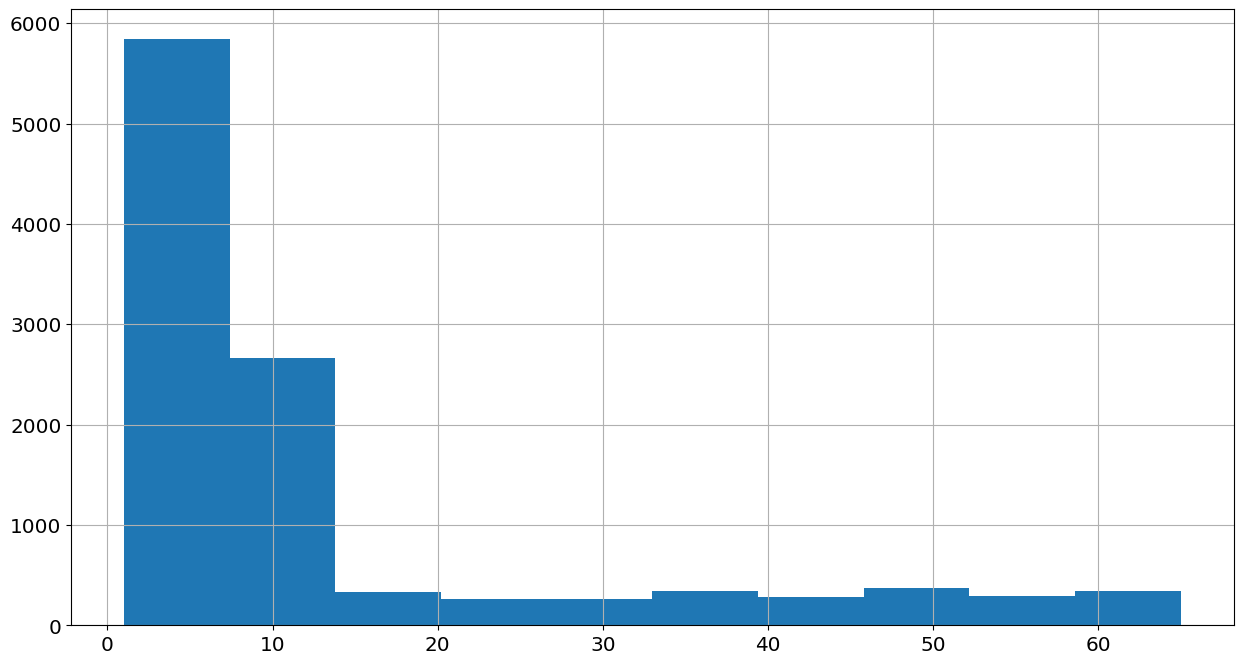

In [19]:
df['desconto'].hist() # Histograma da variável desconto
plt.show()

In [20]:
# Calcular os limites para identificação de outliers
limite_superior = df['desconto'].mean() + 3 * df['desconto'].std()
print(f'Limite superior para identificação de outliers: {limite_superior}') 
limite_inferior = df['desconto'].mean() - 3 * df['desconto'].std()
print(f'Limite inferior para identificação de outliers: {limite_inferior}')

Limite superior para identificação de outliers: 61.987374075326734
Limite inferior para identificação de outliers: -35.24228316623583


In [21]:
# Extrair os valores outliers de desconto:
df_outliers_desconto = df[(df['desconto'] <= limite_inferior) | (df['desconto'] >= limite_superior)]
df_outliers_desconto.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1


In [22]:
# Filtrar o dataframe original para remover os outliers:
df = df[(df['desconto'] > limite_inferior) & (df['desconto'] < limite_superior)]
print(f'Número de linhas após o filtro de outliers da coluna \'desconto\': {df.shape[0]}')

Número de linhas após o filtro de outliers da coluna 'desconto': 10819


In [23]:
registros = np.array([True] * len(df)) # Array de booleanos
type(registros)

numpy.ndarray

In [24]:
np.count_nonzero(registros == True) # Contando quantos registros são True

10819

In [25]:
np.count_nonzero(registros == False) # Contando quantos registros são True

0

In [26]:
num2 = ['numero_chamadas_cliente', 'avaliacao_cliente', 'compras_anteriores',
        'custo_produto', 'peso_gramas'] # Lista de colunas numéricas sem a coluna desconto

In [27]:
for each_col in num2:
    zscore = np.abs(stats.zscore(df[each_col])) # Calculando o z-score absoluto
    registros = (zscore < 3) & registros # Atualizando o array de booleanos com os registros dentro do limite

In [28]:
np.count_nonzero(registros == True) # Contando quantos registros são True

10643

In [29]:
np.count_nonzero(registros == False) # Contando quantos registros são False

176

In [30]:
df = df[registros] # Filtrando o dataframe original com os registros dentro do limite

In [31]:
print(f'Número de linhas após o filtro de outliers: {df.shape[0]}')

Número de linhas após o filtro de outliers: 10643


## Tratamento de Desbalanceamento de Classe

In [32]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [33]:
df['entregue_no_prazo'].value_counts() # Verificando o balanceamento da variável target

entregue_no_prazo
1    6282
0    4361
Name: count, dtype: int64

Não há necessidade de balancear as classes, pois o dataset já está balanceado.

## Features Selection (decidir quais atributos usar no modelo)

In [34]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [35]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
9727,9728,F,Aviao,5,4,97,3,media,F,8,4577,0
5028,5029,D,Navio,3,5,149,2,media,M,5,1023,0
8946,8947,D,Navio,4,3,236,3,baixa,M,1,4752,0
5714,5715,A,Navio,4,2,258,7,media,M,3,4538,1
6281,6282,F,Caminhao,6,4,287,4,media,F,9,1936,1


In [36]:
df_corr = df[['ID', 'numero_chamadas_cliente',
             'avaliacao_cliente', 'custo_produto', 
             'compras_anteriores', 'desconto', 'peso_gramas',
             'entregue_no_prazo']].corr() # Calculando a matriz de correlação
df_corr # Visualizando a matriz de correlação

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
ID,1.000000,0.190104,-0.008010,0.197842,0.184451,-0.591557,0.263811,-0.403501
numero_chamadas_cliente,0.190104,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186,-0.066327
avaliacao_cliente,-0.008010,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440,0.014809
custo_produto,0.197842,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885,-0.071954
compras_anteriores,0.184451,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066,-0.062599
desconto,-0.591557,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062,0.388192
peso_gramas,0.263811,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000,-0.258815
entregue_no_prazo,-0.403501,-0.066327,0.014809,-0.071954,-0.062599,0.388192,-0.258815,1.000000


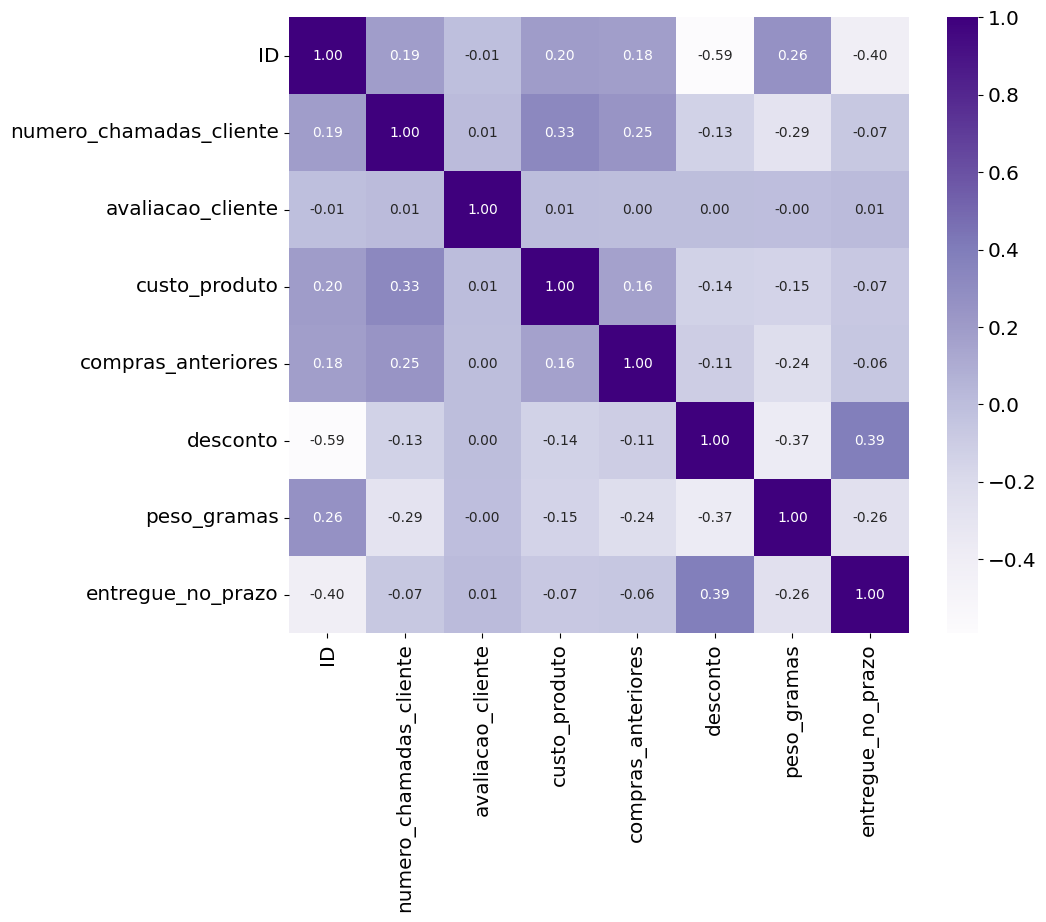

In [37]:
# Construir mapa de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, cmap='Purples', annot=True, fmt='.2f')
# cmap: mapa de cores, annot: exibir os valores, fmt: formato dos valores
plt.show()

Decisão: utilizar apenas os atributos numéricos que possuam correlação maior que 0,05 com a variável target. Desta forma, o atributo 'avaliacao_cliente' não será utilizado.

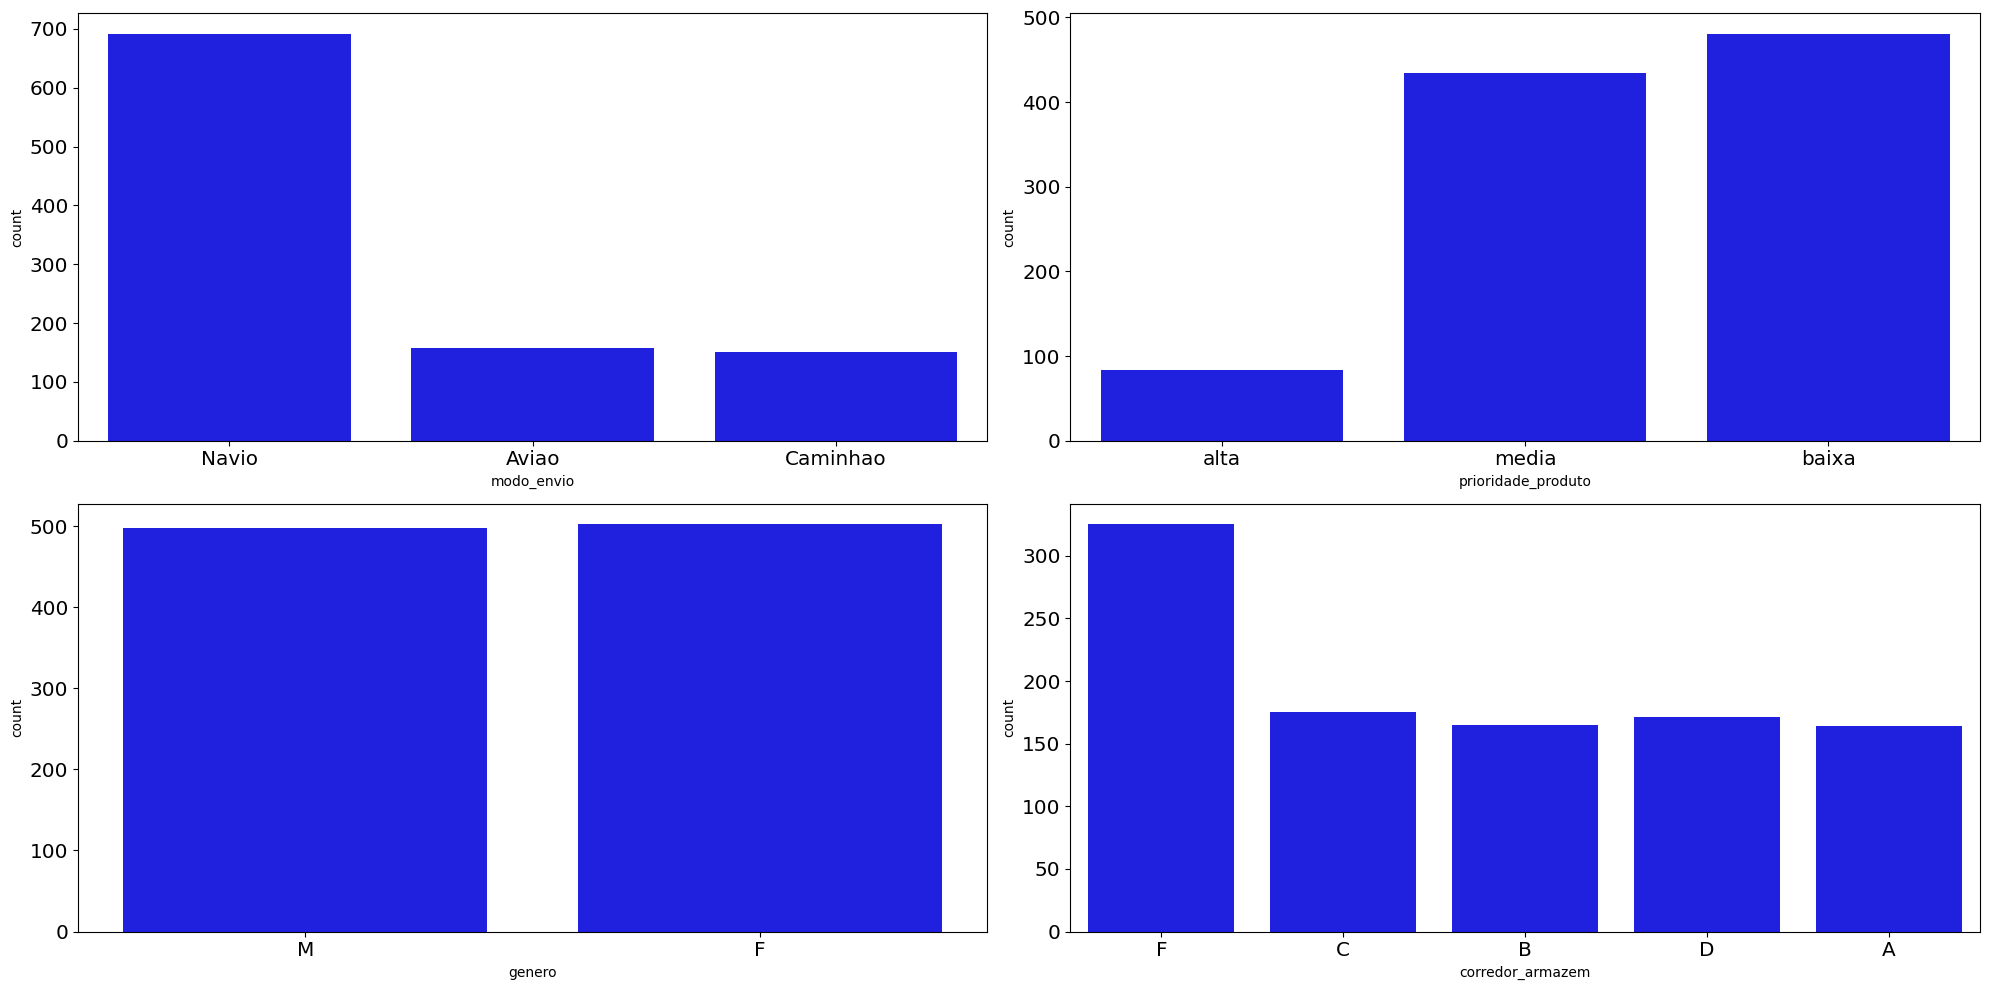

In [38]:
# Gráfico de barras para os atributos categóricos
df_sample = df.sample(1000, random_state=42) # Amostra aleatória de 1000 registros
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_sample[cats[i]], color='blue', orient='v')
    plt.tight_layout()
plt.show()

Não iremos utilizar a variável 'genero' pois ela não possui grande discrepância para a variável target entre as classes.

## Feature Extraction (criar novos atributos)

In [39]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [40]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [41]:
df_eng = df.copy() # Criando uma cópia do dataframe original

In [42]:
df_eng.shape # Verificando o tamanho do dataframe

(10643, 12)

In [43]:
df_eng.dtypes # Verificando os tipos de dados

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

### 1 - Performance de Envio do Produto por Prioridade do Produto

In [44]:
df_eng.prioridade_produto.value_counts() # Verificando a distribuição dos valores da coluna prioridade_produto

prioridade_produto
baixa    5174
media    4587
alta      882
Name: count, dtype: int64

In [45]:
df_eng['performance_prioridade_envio'] = np.nan # Criando uma nova coluna com valores nulos

In [46]:
df_eng['performance_prioridade_envio'] = np.where(
    (df_eng['prioridade_produto'] == 'alta') & 
    (df_eng['entregue_no_prazo'] == 0), 
    'Ruim', 'Excelente') # apenas para aprendizado. Solução definitiva está mais abaixo.

In [47]:
df_eng['performance_prioridade_envio'].value_counts() # Verificando a distribuição dos valores da nova coluna

performance_prioridade_envio
Excelente    10333
Ruim           310
Name: count, dtype: int64

In [48]:
df_eng['performance_prioridade_envio'] = np.nan # Limpando os dados

In [49]:
# Solução adequada:
df_eng['performance_prioridade_envio'] = np.where(
    (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Crítico',
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático',
        np.where(
            (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável',
            'Não Houve Atraso'
        ))) # Criando a nova coluna com base nas condições

In [50]:
df_eng['performance_prioridade_envio'].value_counts() # Verificando a distribuição dos valores da nova coluna

performance_prioridade_envio
Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: count, dtype: int64

In [57]:
df_eng.sample(5) # Amostra aleatória de 5 registros

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
5739,5740,B,Caminhao,4,5,164,3,alta,M,7,4657,0,Atraso Crítico
10382,10383,A,Navio,4,3,207,2,media,M,5,4286,0,Atraso Problemático
4580,4581,A,Navio,3,1,237,2,baixa,M,9,4626,1,Não Houve Atraso
3949,3950,F,Caminhao,4,5,174,3,media,F,8,5576,0,Atraso Problemático
756,757,D,Navio,4,5,195,5,media,F,10,3537,1,Não Houve Atraso
